# **Challenge for “Merit Prize” 2024/2025**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

In [1]:
from sklearn import datasets

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit on the training set only (avoid data leakage)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Pergunta 1)

In [6]:
######## ELIMINAR?

from sklearn.model_selection import StratifiedShuffleSplit

# Create StratifiedShuffleSplit cross-validation (with stratification)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform logistic regression
model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train)

# Predict on training data and calculate accuracy
train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_accuracy:.5f}")

# Predict on test data and calculate accuracy
test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_accuracy:.5f}")


Accuracy on training data of logistic regression model: 0.98744
Accuracy on testing data of logistic regression model: 0.98246


In [31]:
######## ELIMINAR?

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then fits the Logistic Regression model
model = make_pipeline(StandardScaler(), LogisticRegression())

# Evaluate with cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validated accuracy: {scores.mean():.5f} ± {scores.std():.5f}")


Cross-validated accuracy: 0.98246 ± 0.01046


#### Pergunta 2)

Silhouette scores: [0.6342383311602003, 0.37396749256823325, 0.296856207487809, 0.2375130148897967, 0.32843431055261213, 0.12895831773233057, 0.14858391516458752, 0.18991873957605424, 0.17386043443000393, 0.20451344217242573, 0.2077727521397312]
Spearman correlation: -0.6636, P-value: 0.0260


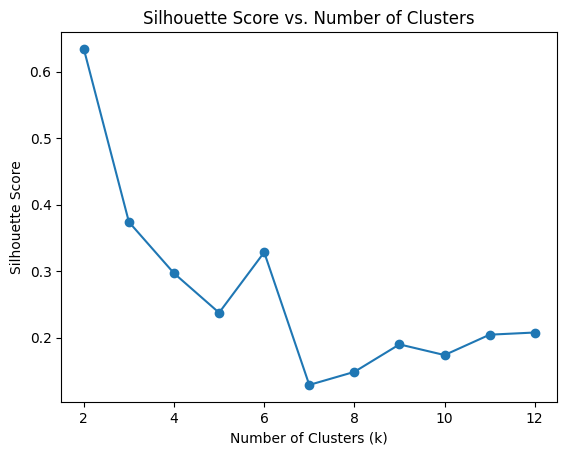

Optimal number of clusters (k) 2


In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Range of cluster numbers to evaluate
k_values = range(2, 13)
silhouette_scores = []

# Perform EM clustering for different k
for k in k_values:

    # Initialize and fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, init_params='random_from_data', n_init=2, random_state=42)
    gmm.fit(X_train)
    
    # Predict cluster labels
    cluster_labels = gmm.predict(X_train)
    
    # Evaluate Silhouette Score
    score = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(score)
    

# Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]

print("Silhouette scores:", silhouette_scores)      # Debug

spearman_corr, spearman_p_value = spearmanr(k_values, silhouette_scores)
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p_value:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


print("Optimal number of clusters (k)", optimal_k)



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O critério interno de *silhouette* avalia a qualidade de *clustering*, tomando em consideração duas métricas importantes: a coesão, que determina a proximidade entre pontos que pertencem ao mesmo *cluster* e a separação, que traduz a distância a que um ponto se encontra de pontos de diferentes *clusters*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Relacionando o número de *clusters* (k) com o valor de "silhouette" para cada, é possível inferir, através da observação do gráfico, como este valor altera conforme o número de *clusters* escolhido. Inicialmente o valor começa elevado, aproximadamente 
0.63. De seguida, sofre uma descida acentuada até k=7 e, por fim, observamos um aumento pouco significativo até k=12, pelo que consideramos que a qualidade de *clustering* estabiliza com valores à volta dos 0.2. Sendo assim, a quantidade de *clusters* parece afetar o resultado da *silhouette* obtido. Para confirmar, foi calculada a correlação de Spearman, a qual será mais adequada que a correlação de Pearson, uma vez que a relação entre as variáveis é não linear e, apesar de não ser completamente monótona, a correlação de Spearman permite perceber a direção predominante da relação. Foi então obtido o valor arredondado de -0.66, o que indica uma relação inversa elevada entre as variáveis, e o *p-value* de 0.0260, uma vez menor do que valores usuais de significância (5%, 10%), o qual permite concluir que os resultados observados são estatisticamente significativos.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Concluímos, assim, que o valor ótimo para k é 2, ao qual corresponde o valor mais elevado de *silhouette*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Detalhe:**
Para realizar o *EM clustering*, foi utilizada a função *GaussianMixture*, que depende da distância de Mahalanobis. Como tal, a multiplicação pela matriz de covariância inversa assegura uma contribuição de cada *feature* mais equilibrada e, tendo isto em conta, não foi realizado *scaling*. Na questão da inicialização, para obter os centróides iniciais, na escolha no argumento *init_params*, foram evitadas *k-means* e *k-means++* uma vez que estes algoritmos teriam necessitado da realização de *scaling* e não houve perdas de *silhouette score* ao utilizar *random_from_data*. Também para melhorar a confiabilidade do modelo foram realizadas duas inicializações em cada modelo, *n_init=2*, o que procura evitar problemas de convergência sem aumentar demasiado o tempo computacional.

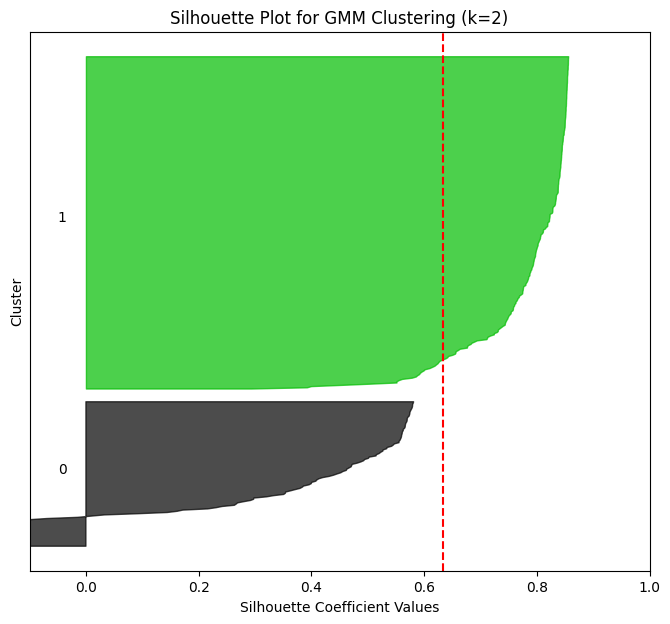

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Initialize and fit GMM for the optimal k
gmm = GaussianMixture(n_components=optimal_k, init_params='random_from_data', n_init=2, random_state=42)
gmm.fit(X_train)
cluster_labels = gmm.predict(X_train)

# Calculate silhouette scores for each sample
silhouette_avg = silhouette_score(X_train, cluster_labels)
silhouette_values = silhouette_samples(X_train, cluster_labels)

# Plot the silhouette
fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))

y_lower = 10  # Starting position for the silhouette plots
for i in range(optimal_k):
    # Extract silhouette scores for the current cluster
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()  # Sort for better visualization

    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    # Color map for the silhouette plots
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))  # Add cluster labels
    y_lower = y_upper + 10  # Add spacing between plots

# Add average silhouette score as a vertical line
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title(f"Silhouette Plot for GMM Clustering (k={optimal_k})")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster")
ax1.set_yticks([])  # Remove y-axis ticks for clarity
ax1.set_xlim([-0.1, 1])  # Silhouette values range from -1 to 1
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gráfico que permite visualizar a divisão dos pontos entre os dois clusters.

#### Pergunta 3)

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Range of possible k-values (number of clusters)
k_values = range(2, 13)  # Example: k-values from 1 to 12

# Initialize an empty list to store probabilities for each k
train_prob_clusters = {}
test_prob_clusters = {}

# Loop through different k-values to train GMM and get probabilities
for k in k_values:
    # Fit the Gaussian Mixture Model (GMM) with k clusters
    em_model = GaussianMixture(n_components=k, random_state=42)
    em_model.fit(X_train)
    
    # Map the training and test sets into probability values of the clusters
    train_probabilities = em_model.predict_proba(X_train)
    test_probabilities = em_model.predict_proba(X_test)
    
    # Store the probabilities for train and test sets for this k-value
    train_prob_clusters[k] = train_probabilities
    test_prob_clusters[k] = test_probabilities

print(test_prob_clusters)

{2: array([[8.45317965e-013, 1.00000000e+000],
       [1.00000000e+000, 7.98725997e-101],
       [9.99999903e-001, 9.74364029e-008],
       [4.79691619e-023, 1.00000000e+000],
       [3.29595693e-028, 1.00000000e+000],
       [1.00000000e+000, 5.15118097e-058],
       [1.00000000e+000, 1.05400216e-207],
       [1.00000000e+000, 3.58578868e-013],
       [1.00000000e+000, 1.08956508e-014],
       [5.37102624e-011, 1.00000000e+000],
       [2.38594015e-010, 1.00000000e+000],
       [1.00000000e+000, 5.87241433e-017],
       [4.51319532e-006, 9.99995487e-001],
       [5.93434266e-001, 4.06565734e-001],
       [3.97311911e-011, 1.00000000e+000],
       [1.00000000e+000, 1.16758100e-041],
       [6.60425533e-007, 9.99999340e-001],
       [1.49677648e-058, 1.00000000e+000],
       [1.74792741e-112, 1.00000000e+000],
       [1.00000000e+000, 6.27211373e-096],
       [8.38060972e-005, 9.99916194e-001],
       [1.28295310e-016, 1.00000000e+000],
       [1.00000000e+000, 3.42801970e-171],
       

#### Pergunta 4)

In [14]:
# Scailing?

log_reg_accuracies = []

for k in k_values:
    
    # Now, perform Logistic Regression on the mapped test data
    log_reg = LogisticRegression(max_iter=10000)
    
    # Train Logistic Regression on the probability values (i.e., the mapped data from GMM)
    log_reg.fit(train_prob_clusters[k], y_train)
    
    # Make predictions using the Logistic Regression model
    y_pred = log_reg.predict(test_prob_clusters[k])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    log_reg_accuracies.append(accuracy)
    
    # Print the accuracy for this k-value
    print(f"Accuracy of Logistic Regression with k={k}: {accuracy:.5f}")

Accuracy of Logistic Regression with k=2: 0.92398
Accuracy of Logistic Regression with k=3: 0.93567
Accuracy of Logistic Regression with k=4: 0.89474
Accuracy of Logistic Regression with k=5: 0.89474
Accuracy of Logistic Regression with k=6: 0.88304
Accuracy of Logistic Regression with k=7: 0.87719
Accuracy of Logistic Regression with k=8: 0.87719
Accuracy of Logistic Regression with k=9: 0.90643
Accuracy of Logistic Regression with k=10: 0.91228
Accuracy of Logistic Regression with k=11: 0.88304
Accuracy of Logistic Regression with k=12: 0.90643


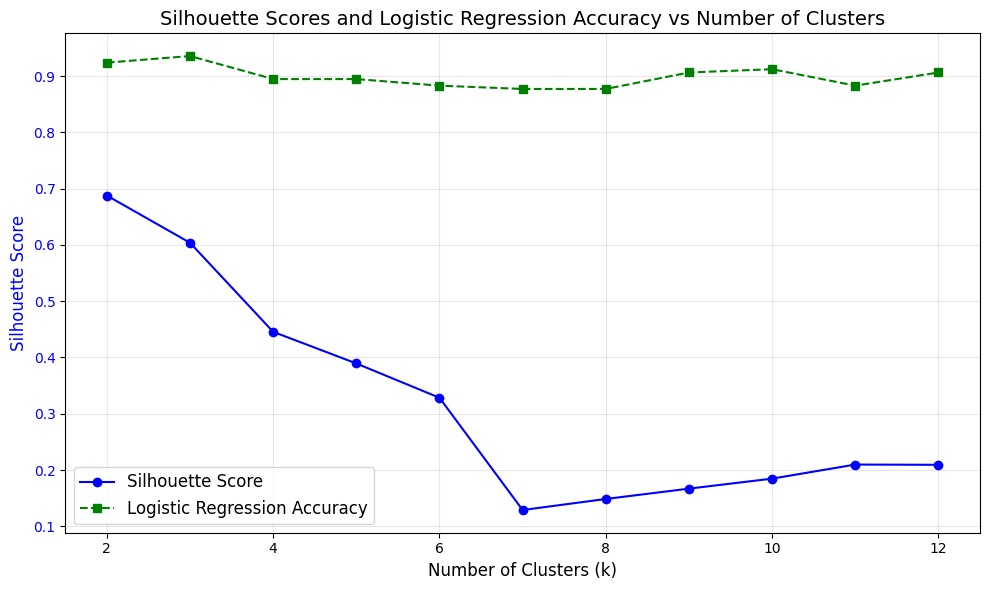

In [15]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot silhouette scores
ax1.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
ax1.set_ylabel("Silhouette Score", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add logistic regression accuracy to the same plot
ax1.plot(k_values, log_reg_accuracies, marker='s', linestyle='--', color='green', label='Logistic Regression Accuracy')

# Add a grid, legend, and title
ax1.legend(loc="best", fontsize=12)
plt.title("Silhouette Scores and Logistic Regression Accuracy vs Number of Clusters", fontsize=14)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Após a aplicação da transformação ao conjunto de dados, podemos determinar a accuracy do modelo de logistic regression, de forma a avaliar a sua capacidade preditiva em função do número de clusters e compará-la com a qualidade de clustering.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Olhando para o gráfico resultante, verificamos que a accuracy da logistic regression se mantém estável independentemente do número de clusters considerados e do valor de silhueta respetivo. Podemos, então, inferir que não existe uma relação entre a performance deste modelo e a qualidade de clustering, isto é, uma má separação e coesão dos clusters não implicam uma menor capacidade de classificação.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Este comportamento pode ser explicado pelo uso dos dados transformados no treino do modelo. Ao transformarmos os dados em probabilidades dos k-clusters, estamos, efetivamente, a reduzir a dimensionalidade de d para k (onde d é o número de features original). Neste caso, as probabilidades assumem o papel de features e contêm informações relevantes para a classificação, mesmo quando a silhouette é baixa, proporcionando à logistic regression uma accuracy elevada e estável, à volta dos 90%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Em suma, existe uma relação entre o número de clusters e o a qualidade de clustering, tal como foi averiguado na segunda pergunta, mas não existe uma relação entre estes e a accuracy do modelo de logistic regression treinado com o conjunto de dados transformado. As probabilidades resultantes do EM clustering permitem ao modelo realizar uma boa classificação independente do aumento do número de clusters e do descréscimo da silhueta.

#### Pergunta 5)

In [69]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize RBF centers without clustering (e.g., random selection)
random_centers = X_train_scaled[np.random.choice(X_train.shape[0], size=optimal_k, replace=False)]

# Compute RBF features using random centers
def rbf_features(X, centers, sigma=1.0):
    """Generate RBF features using the Gaussian kernel."""
    features = np.exp(-np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2 / (2 * sigma**2))
    return features

# Generate RBF features for train and test sets
X_train_rbf_random = rbf_features(X_train_scaled, random_centers)
X_test_rbf_random = rbf_features(X_test_scaled, random_centers)

# Train logistic regression on these RBF features
log_reg_random = LogisticRegression(max_iter=10000)
log_reg_random.fit(X_train_rbf_random, y_train)
train_pred_random = log_reg_random.predict(X_train_rbf_random)
test_pred_random = log_reg_random.predict(X_test_rbf_random)

# Predict on training data and calculate accuracy
train_acc_no_clustering = accuracy_score(y_train, train_pred_random)

print(f"Accuracy on training data of logistic regression model: {train_acc_no_clustering:.5f}")

# Predict on test data and calculate accuracy
test_acc_no_clustering = accuracy_score(y_test, test_pred_random)

print(f"Accuracy on testing data of logistic regression model: {test_acc_no_clustering:.5f}")



Accuracy on training data of logistic regression model: 0.62814
Accuracy on testing data of logistic regression model: 0.63158


In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import numpy as np

# Optimal number of clusters from Question 2
k = optimal_k  # Replace this with the actual optimal k from your previous analysis

# Define the radial basis function
def rbf(x, c, s):
    return np.exp(-np.linalg.norm(x-c)**2 / (2 * s**2))

# Step 1: Perform GMM clustering on training data
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_train_scaled)

# Cluster centers and variances
centroids = gmm.means_  # Centers of the clusters
print(centroids)

# Calculate the spread parameter
d_max = np.max(cdist(centroids, centroids, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centroids))

# Step 2: Define the RBF transformation
def rbf_transform(X, centroids, sigma):
    """Apply RBF transformation to data."""
    transformed = np.zeros((X.shape[0], len(centroids)))
    for i in range(X.shape[0]):
        for j in range(len(centroids)):
            transformed[i, j] = rbf(X[i], centroids[j], sigma)
    return transformed

# Transform training and test data using RBF
X_train_rbf = rbf_transform(X_train_scaled, centroids, sigma)
X_test_rbf = rbf_transform(X_test_scaled, centroids, sigma)

# Step 3: Train logistic regression on RBF-transformed data
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_rbf, y_train)

# Step 4: Evaluate the model
train_pred = log_reg.predict(X_train_rbf)
test_pred = log_reg.predict(X_test_rbf)

# Predict on training data and calculate accuracy
train_acc_with_clustering = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_acc_with_clustering:.5f}")

# Predict on test data and calculate accuracy
test_acc_with_clustering = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_acc_with_clustering:.5f}")


[[ 0.89175283  0.42521779  0.91900881  0.8705828   0.52853173  0.90358729
   1.01819207  1.05088848  0.56311688  0.17729652  0.71392122  0.0368889
   0.71725247  0.66326834  0.0081007   0.55318243  0.53866538  0.64182433
   0.14768118  0.33059741  0.95636799  0.46642626  0.98244311  0.9076827
   0.54672523  0.85316987  0.96883659  1.04541611  0.59898769  0.54967245]
 [-0.52046429 -0.24817491 -0.53637201 -0.50810857 -0.30847324 -0.52737137
  -0.59425952 -0.61334251 -0.32865859 -0.10347767 -0.41667431 -0.02152991
  -0.41861857 -0.38711117 -0.00472791 -0.32286043 -0.31438766 -0.37459555
  -0.08619292 -0.19295049 -0.5581764  -0.27222589 -0.57339493 -0.52976162
  -0.31909173 -0.49794566 -0.56545359 -0.61014861 -0.34959429 -0.32081185]]
Accuracy on training data of logistic regression model: 0.90452
Accuracy on testing data of logistic regression model: 0.90643


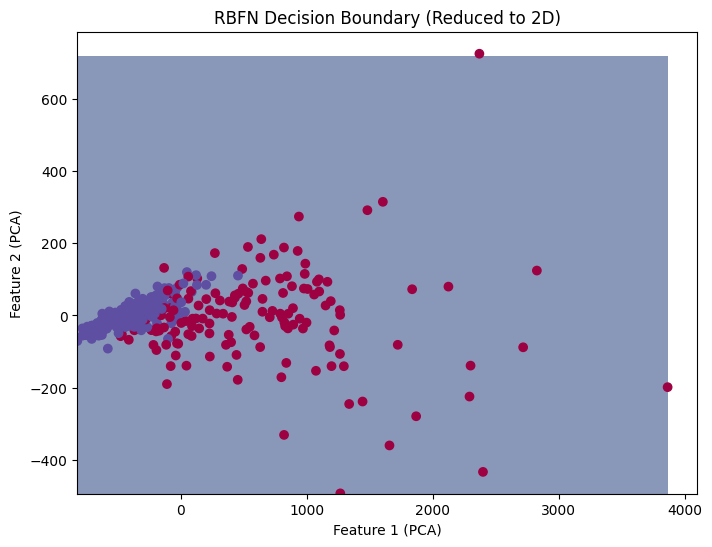

In [17]:
from sklearn.decomposition import PCA

# Reduce training data and centroids to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  # Transform the training data to 2D
centroids_2d = pca.transform(centroids)  # Transform the centroids to 2D

# Generate the grid again in the reduced 2D space
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
grid_resolution = 10.0  # Coarser resolution for faster computation
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_resolution), 
                     np.arange(y_min, y_max, grid_resolution))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# RBF transform in the reduced 2D space
grid_points_rbf = rbf_transform(grid_points, centroids_2d, sigma)

# Continue with prediction and visualization
Z = log_reg.predict(grid_points_rbf)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title("RBFN Decision Boundary (Reduced to 2D)")
plt.xlabel("Feature 1 (PCA)")
plt.ylabel("Feature 2 (PCA)")
plt.show()


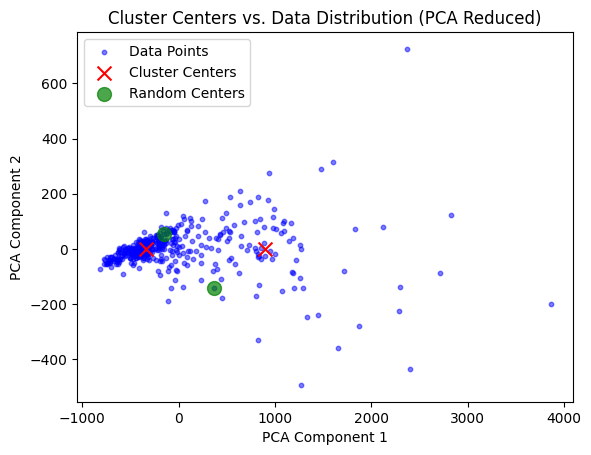

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)



# Project cluster centers to PCA space
cluster_centers_pca = pca.transform(centroids)

# Plot data and cluster centers
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='blue', s=10, label='Data Points', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

# Optional: Compare with random centers
random_centers = X_train[np.random.choice(X_train.shape[0], size=optimal_k, replace=False)]
random_centers_pca = pca.transform(random_centers)
plt.scatter(random_centers_pca[:, 0], random_centers_pca[:, 1], c='green', marker='o', s=100, label='Random Centers', alpha=0.7)

plt.legend()
plt.title('Cluster Centers vs. Data Distribution (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


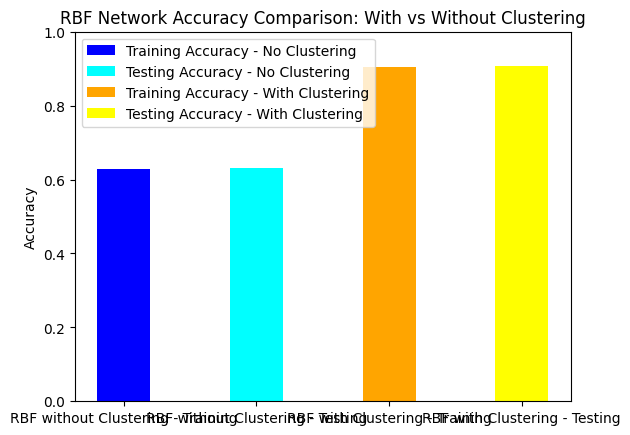

In [70]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['RBF without Clustering - Training', 'RBF without Clustering - Testing', 
              'RBF with Clustering - Training', 'RBF with Clustering - Testing']
no_clustering = [train_acc_no_clustering, test_acc_no_clustering]
with_clustering = [train_acc_with_clustering, test_acc_with_clustering]

# Create the plot
x = range(len(categories))  # X-axis positions

# Create the bars for RBF without clustering
plt.bar(x[0], train_acc_no_clustering, width=0.4, label='Training Accuracy - No Clustering', color='blue')
plt.bar(x[1], test_acc_no_clustering, width=0.4, label='Testing Accuracy - No Clustering', color='cyan')

# Create the bars for RBF with clustering
plt.bar(x[2], train_acc_with_clustering, width=0.4, label='Training Accuracy - With Clustering', color='orange')
plt.bar(x[3], test_acc_with_clustering, width=0.4, label='Testing Accuracy - With Clustering', color='yellow')

# Add labels and legend
plt.xticks(x, categories)  # Position x-axis labels
plt.ylabel('Accuracy')
plt.title('RBF Network Accuracy Comparison: With vs Without Clustering')
plt.legend()
plt.ylim(0, 1)  # Scale from 0 to 1 for accuracy

# Show the plot
plt.show()
